## Hand landmark visualization
This notebook shows an example how to visualize hand landmarks we generated via [Mediapipe](https://google.github.io/mediapipe/).

In [52]:
import cv2
import json
import pandas as pd
from matplotlib import pyplot as plt

In [44]:
sample_video = 'path/to/sample_video/44e8d2a0-7e01-450b-90b0-beb7400d2c1e.mp4'
sample_id = sample_video.split('/')[-1][:-4]

In [13]:
# get video width and height
df = pd.read_csv('path/to/annotations.csv', sep='\t')
target = df[df['attachment_id'] == sample_id]
width, height = int(target['width']), int(target['height'])

In [42]:
with open('path/to/slovo_mediapipe.json') as file:
    landmarks = json.load(file)

In [47]:
# calculate absolute landmark values
landmark_abs = landmarks[sample_id]
for frame in landmark_abs:
    for hand in frame:
        points = frame[hand]
        for point in points:
            point['x'] = point['x'] * width
            point['y'] = point['y'] * height

For each hand in each frame we have 21 keypoints

In [53]:
from IPython.display import Image
Image(url= "https://developers.google.com/static/mediapipe/images/solutions/hand-landmarks.png")

*Source: [MediaPipe Solutions Guide](https://developers.google.com/mediapipe/solutions/vision/hand_landmarker)*

In [50]:
def draw_hand_from_keypoints(fig, points):
    keypoint_lines = [(0, 1), (1, 2), (2, 3), (3, 4),
        (0, 5), (5, 6), (6, 7), (7, 8),
        (5, 9), (9, 10), (10, 11), (11, 12),
        (9, 13), (13, 14), (14, 15), (15, 16),
        (13, 17), (17, 18), (18, 19), (19, 20)]
    
    # draw keypoints
    for point in points:
        fig.scatter(point['x'], point['y'], c='r', s=25)
    
    # draw lines between keypoints
    for pair in keypoint_lines:
        idx1, idx2 = pair
        fig.plot([points[idx1]['x'], points[idx2]['x']], [points[idx1]['y'], points[idx2]['y']], c='g')

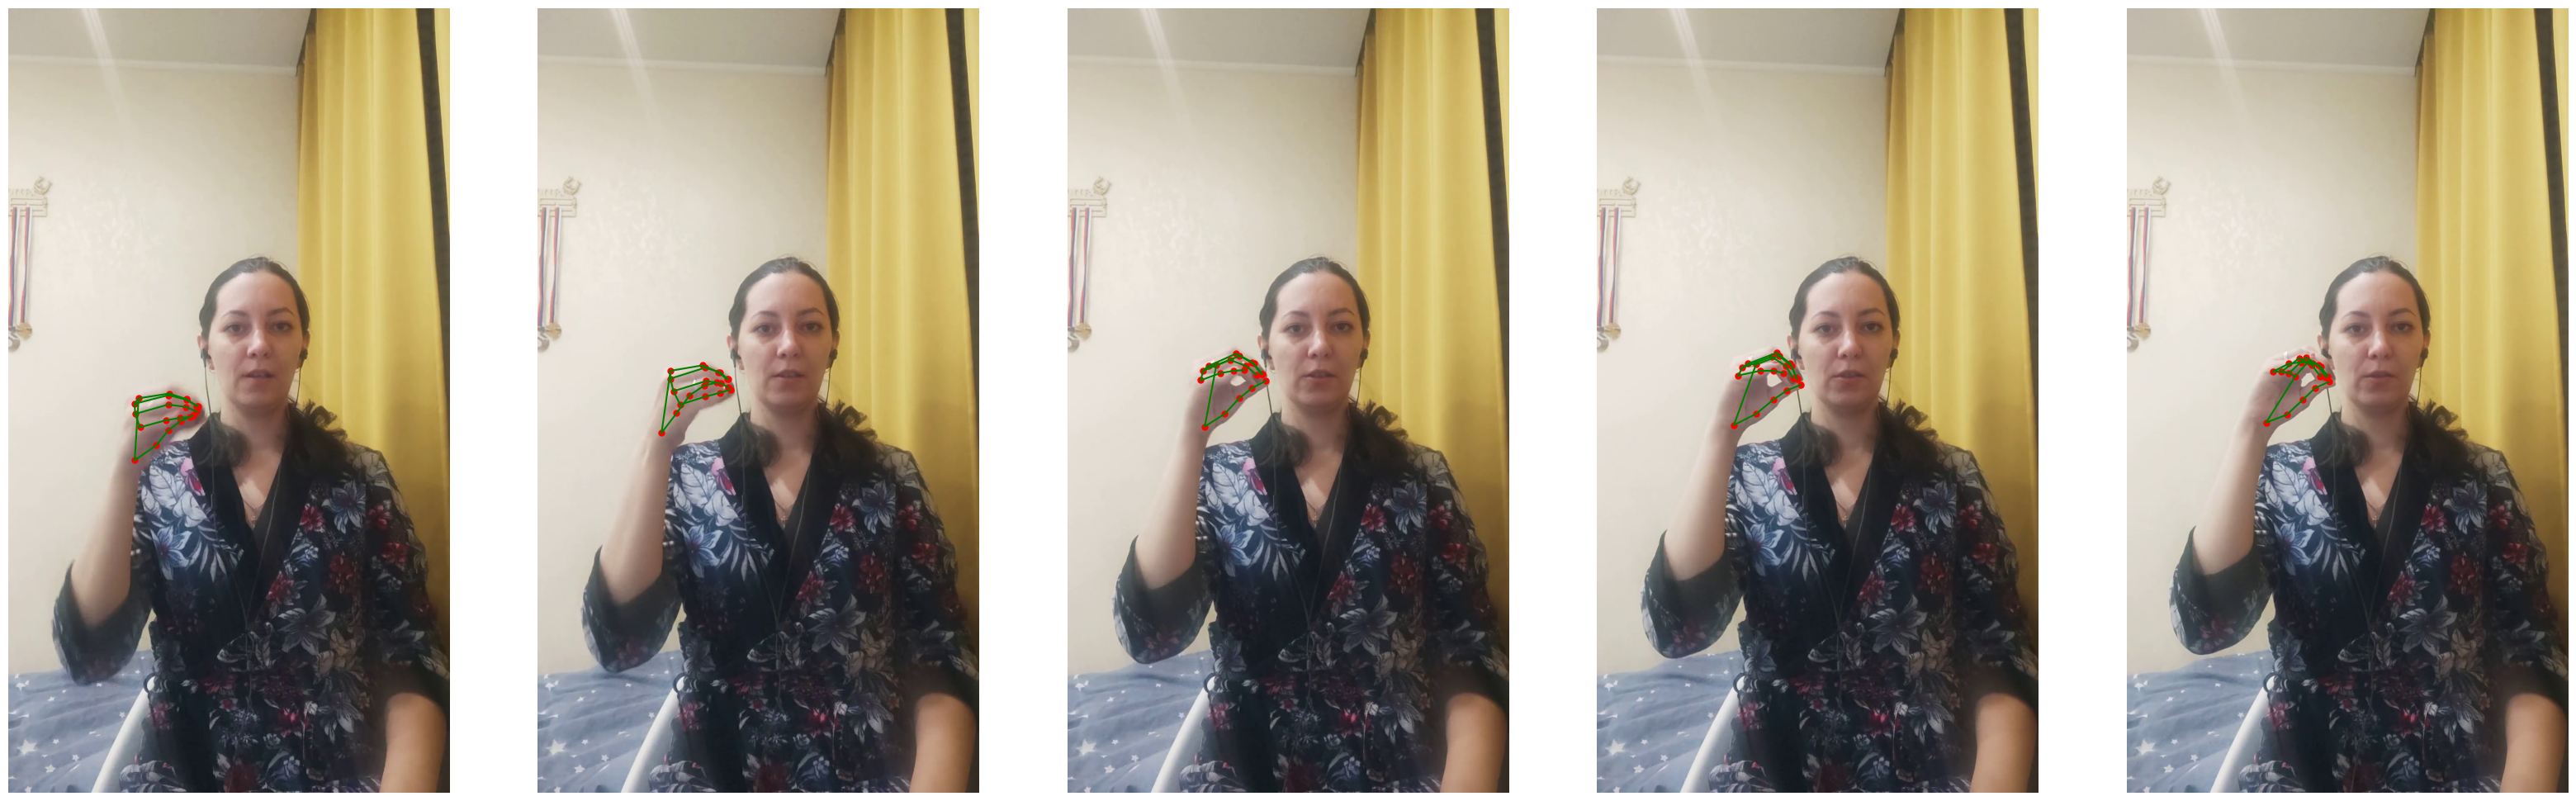

In [56]:
NUM_FRAMES = 5
STEP = 4 # sampling step (in frames)

fig, axes_list = plt.subplots(nrows=1, ncols=NUM_FRAMES, figsize=(40, 40))
vidcap = cv2.VideoCapture(sample_video)

for i in range(NUM_FRAMES):
    vidcap.set(cv2.CAP_PROP_POS_FRAMES, (i * STEP) - 1)
    success, frame = vidcap.read()
    axes_list[i].imshow(frame[:, :, ::-1])
    axes_list[i].axis('off')
    multi_hand_landmarks = landmark_abs[i * STEP]
    for hand in multi_hand_landmarks:
        points = multi_hand_landmarks[hand]
        draw_hand_from_keypoints(axes_list[i], points)
plt.show() 